# 1. Importing and installing dependicies

In [1]:
!pip install scikit-learn

In [2]:
!pip install tensorflow opencv-python mediapipe

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2024-05-30 20:07:10.941987: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2. Mapping Keypoints using MediaPipe Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),# colors the landmark or dot
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)# colors the connection or lines
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), # colors the landmark 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2) #colors the connection
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), # colors the landmark 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2) #colors the connection
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), # colors the landmark 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)  #colors the connection
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Accessing mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():

        # Reading camera feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Showing to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

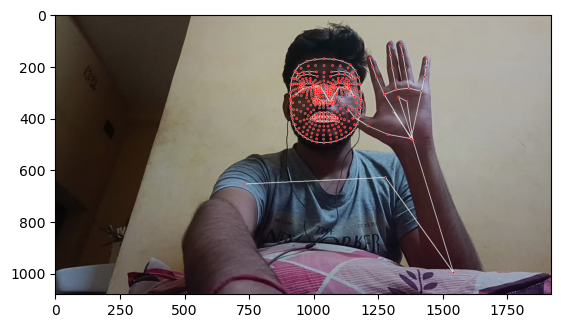

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
len(pose)

33

In [13]:
len(results.face_landmarks.landmark)*3

1404

In [14]:
# ERROR HANDLING in case of null value
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
rh # displaying all zero data in case we don't have input through image

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
# Wrapping everything inside one func
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
extract_keypoints(results).shape

(1662,)

In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 0.55384731,  0.31555477, -0.46759427, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.55384731,  0.31555477, -0.46759427, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [102]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['jumping', 'clapping', 'waving'])

# Thirty videos worth of data
no_sequences = 30

# Each videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0


In [103]:
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)

In [104]:
files = os.listdir(action_path)
if files:  # Check if the directory is not empty
    dirmax = np.max(np.array(files).astype(int))
else:
    dirmax = start_folder  # Set a default start value if the directory is empty


In [105]:
for sequence in range(0, no_sequences - 1):
    try: 
        os.makedirs(os.path.join(DATA_PATH, action, str(dirmax + sequence)))
    except Exception as e:
        print(f"Error creating directory for sequence {sequence} for action {action}: {e}")


# 5. Collect Keypoint Values for Training and Testing

In [106]:
# Video files for each action
video_files = {
    'jumping': ['/Users/macbookpro/Documents/Aliah university/HumanAP/jumping1.mp4'],
    'clapping': ['/Users/macbookpro/Documents/Aliah university/HumanAP/clapping1.mp4'],
    'waving': ['/Users/macbookpro/Documents/Aliah university/HumanAP/waving.mp4']
}

actions = ['jumping', 'clapping', 'waving']
start_folder = 0
no_sequences = 30
sequence_length = 30  # Assuming a fixed sequence length for simplicity
DATA_PATH = "MP_Data"

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder + no_sequences):
            # Open the video file
            video_file= video_files[action][0]  # Assuming there's only one video file per action
            cap = cv2.VideoCapture(video_file)

            # Check if the video capture is successful
            if not cap.isOpened():
                print(f"Error: Could not open video file {video_file}.")
                continue

            # Create the directory for the action and sequence if it doesn't exist
            sequence_dir = os.path.join(DATA_PATH, action, str(sequence))
            if not os.path.exists(sequence_dir):
                os.makedirs(sequence_dir)

            # Calculate the number of frames to capture based on the frame rate and duration
            fps = int(cap.get(cv2.CAP_PROP_FPS))
            num_frames = fps * 3  # Adjusted to capture frames for 3 seconds

            # Loop through video length aka sequence length
            for frame_num in range(num_frames):
                # Read feed
                ret, frame = cap.read()

                # Check if frame is successfully read
                if not ret or frame is None:
                    print(f"Error: Failed to read frame {frame_num} from video {video_file}.")
                    break

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(sequence_dir, "{}.npy".format(frame_num))
                np.save(npy_path, keypoints)

                # Introduce a delay of 1/fps seconds
                time.sleep(1 / fps)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

            cap.release()

cv2.destroyAllWindows()

In [107]:
cap.release()
cv2.destroyAllWindows()

In [108]:
import os

# List the contents of the MP_Data directory to verify file structure and existence
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    if os.path.exists(action_path):
        print(f"Action: {action}")
        for sequence in range(len(video_files[action])):
            sequence_path = os.path.join(action_path, str(sequence))
            if os.path.exists(sequence_path):
                print(f"  Sequence {sequence}:")
                files = os.listdir(sequence_path)
                for file in files:
                    print(f"    {file}")
            else:
                print(f"  Sequence {sequence} directory does not exist.")
    else:
        print(f"Action directory {action} does not exist.")


Action: jumping
  Sequence 0:
    121.npy
    135.npy
    109.npy
    20.npy
    34.npy
    35.npy
    21.npy
    108.npy
    134.npy
    120.npy
    136.npy
    122.npy
    37.npy
    23.npy
    22.npy
    36.npy
    123.npy
    137.npy
    133.npy
    127.npy
    32.npy
    26.npy
    27.npy
    33.npy
    126.npy
    132.npy
    118.npy
    124.npy
    130.npy
    25.npy
    31.npy
    19.npy
    18.npy
    30.npy
    24.npy
    131.npy
    125.npy
    119.npy
    142.npy
    80.npy
    94.npy
    43.npy
    5.npy
    57.npy
    4.npy
    56.npy
    42.npy
    95.npy
    81.npy
    143.npy
    141.npy
    97.npy
    83.npy
    68.npy
    54.npy
    6.npy
    40.npy
    41.npy
    55.npy
    7.npy
    69.npy
    82.npy
    96.npy
    140.npy
    92.npy
    86.npy
    144.npy
    3.npy
    51.npy
    45.npy
    79.npy
    78.npy
    44.npy
    2.npy
    50.npy
    145.npy
    87.npy
    93.npy
    85.npy
    91.npy
    147.npy
    46.npy
    52.npy
    0.npy
    53.npy
    1.npy
    4

In [109]:
import numpy as np

# Parameters
sequence_length = 9  # Adjust according to your needs

sequences = []
labels = []
for action in actions:
    for sequence in range(len(video_files[action])):
        window = []
        for frame_num in range(sequence_length):
            npy_path = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
            if os.path.exists(npy_path):
                res = np.load(npy_path)
                window.append(res)
            else:
                print(f"File {npy_path} does not exist.")
        sequences.append(window)
        labels.append(action)


# 6. Preprocess Data and Create Labels and Features

In [110]:
from sklearn.model_selection import train_test_split #splits into training and testing partition
from tensorflow.keras.utils import to_categorical

In [111]:
label_map = {label:num for num, label in enumerate(actions)}

In [112]:
label_map

{'jumping': 0, 'clapping': 1, 'waving': 2}

In [113]:
import os
import numpy as np

# Define actions and the path where data is stored
actions = ['jumping', 'clapping', 'waving']
DATA_PATH = 'MP_Data'
sequence_length = 9  # Ensure this matches your actual sequence length

# Define a label map if you have one
label_map = {action: i for i, action in enumerate(actions)}

sequences, labels = [], []
for action in actions:
    action_dir = os.path.join(DATA_PATH, action)
    if os.path.exists(action_dir):
        for sequence in sorted(os.listdir(action_dir)):
            sequence_path = os.path.join(action_dir, sequence)
            if os.path.isdir(sequence_path):
                window = []
                for frame_num in range(sequence_length):
                    npy_path = os.path.join(sequence_path, "{}.npy".format(frame_num))
                    if os.path.exists(npy_path):
                        res = np.load(npy_path)
                        window.append(res)
                    else:
                        print(f"File {npy_path} does not exist.")
                        break  # If a file in the sequence is missing, break the loop
                if len(window) == sequence_length:
                    sequences.append(window)
                    labels.append(label_map[action])
    else:
        print(f"Action directory {action_dir} does not exist.")

# Check the resulting sequences and labels
print(f"Number of sequences collected: {len(sequences)}")
print(f"Number of labels collected: {len(labels)}")


Number of sequences collected: 90
Number of labels collected: 90


In [114]:
np.array(sequences).shape

(90, 9, 1662)

In [115]:
np.array(labels).shape

(90,)

In [116]:
X = np.array(sequences)

In [117]:
X.shape

(90, 9, 1662)

In [118]:
y = to_categorical(labels).astype(int) # encoding it like binary position

In [119]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [121]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import TensorBoard

In [123]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [124]:
model = Sequential()
model.add(Input(shape=(sequence_length, X.shape[2])))  # Input layer with shape
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(actions), activation='softmax'))

In [125]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [127]:
# Train model
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 6.6962e-08
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 6.8123e-08
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 1.0000 - loss: 6.2996e-08
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 6.1829e-08
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 6.2295e-08
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 6.7882e-08
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 6.2525e-08
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 5.8799e-08
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 1.0000 - loss: 6.5083e-08
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 1.0000 - loss: 2.2861e-08
Epoch 62/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 1.0000 - loss: 2.2861e-08
Epoch 63/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 2.0999e-08
Epoch 64/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.9602e-08
Epoch 65/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 2.4724e-08
Epoch 66/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 1.0000 - loss: 1.7739e-08
Epoch 67/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 2.5190e-08
Epoch 68/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 2.1464e-08
Epoch 69/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 1.0000 - loss: 2.1930e-08
Epoch 70/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 2.472

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 1.0000 - loss: 7.0123e-10
Epoch 122/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 1.0000 - loss: 7.0123e-10
Epoch 123/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 1.0000 - loss: 2.0982e-09
Epoch 124/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 1.0000 - loss: 2.0982e-09
Epoch 125/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 1.0000 - loss: 1.1669e-09
Epoch 126/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 1.0000 - loss: 2.0982e-09
Epoch 127/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 1.0000 - loss: 1.8681e-09
Epoch 128/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 1.0000 - loss: 7.0123e-10
Epoch 129/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 1.0000 - loss: 2.0982e-09
Epoch 130/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 1.0000 - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 1.1669e-09
Epoch 181/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 1.1669e-09
Epoch 182/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 2.0982e-09
Epoch 183/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 2.0982e-09
Epoch 184/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 2.0982e-09
Epoch 185/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 2.0982e-09
Epoch 186/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.1669e-09
Epoch 187/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.0982e-09
Epoch 188/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.1669e-09
Epoch 189/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - lo

KeyboardInterrupt: 

In [128]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 9, 64)          │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 9, 128)         │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions

In [129]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


In [130]:
actions[np.argmax(res[0])]

'waving'

In [131]:
actions[np.argmax(y_test[0])]

'waving'

# 9. Save Weights

In [132]:
model.save('HumanAR.keras')

In [133]:
from tensorflow.keras.models import load_model

model = load_model('HumanAR.keras')

In [134]:
from tensorflow.keras.models import load_model
import os

model_path = '/Users/macbookpro/Documents/Aliah university/HumanAP/HumanAR.keras'

# Checking if the model file exists
if os.path.exists(model_path):
    try:
        # Load the saved model
        model = load_model(model_path)
        print("Model loaded successfully.")
    except Exception as e:
        print(f"Error loading the model: {e}")
else:
    print(f"Model file not found at {model_path}.")


Model loaded successfully.


# 10. Evaluation using Confusion Matrix and Accuracy

In [135]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [136]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


In [137]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [138]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]]])

In [139]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [140]:
from scipy import stats

In [141]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [147]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Accessing mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Reading camera feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Vizualization logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Showing to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.so

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
clapping
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
waving
<class 'mediapipe.python.solution_ba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.sol

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.sol

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
waving
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
clapping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
jumping
<class 'mediapipe.python.so

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.so

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
jumping
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
jumping
<class 'mediapipe.python.so

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
jumping


error: OpenCV(4.9.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
